In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import adni_utils

rid_to_ptid = adni_utils.get_rid_to_ptid()
visit_num_to_code = adni_utils.get_visit_num_to_code()
dxcurren_num_to_label = adni_utils.dxcurren_num_to_label()

In [2]:
adni1_complete_3Yr_15T_feed = pd.read_csv(adni_utils.ADNI_DATA_DIR + 'ADNI1_Complete_3Yr_1.5T_6_01_2017.csv')

# DO SOME FILTERING OF VALID ROWS
# Visit has to be between 1 and 8 for this study
adni1_complete_3Yr_15T_feed = adni1_complete_3Yr_15T_feed[adni1_complete_3Yr_15T_feed['Visit'] < 9]
# Scaled_2 in Description is always a duplicate of the same subject and visit. TBD what Scaled_2 actually means
adni1_complete_3Yr_15T_feed = adni1_complete_3Yr_15T_feed[
    ['Scaled_2' not in row for row in adni1_complete_3Yr_15T_feed['Description']]
]

# Add user and visit key column
user_key = []
for subj, vis in zip(adni1_complete_3Yr_15T_feed['Subject'], adni1_complete_3Yr_15T_feed['Visit']):
    vis = visit_num_to_code[vis]
    user_key.append(subj+'_'+vis)
adni1_complete_3Yr_15T_feed['user_key'] = user_key
adni1_complete_3Yr_15T_feed

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,user_key
0,63874,941_S_1202,Patient,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN,941_S_1202_bl
1,75150,941_S_1202,Patient,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN,941_S_1202_m06
2,204843,941_S_1202,Patient,M,81,8,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/14/2010,NiFTI,NaN,941_S_1202_m36
3,137298,941_S_1202,Patient,M,80,6,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/17/2009,NiFTI,NaN,941_S_1202_m24
4,105437,941_S_1202,Patient,M,79,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2008,NiFTI,NaN,941_S_1202_m12
5,63847,941_S_1194,Patient,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,1/20/2007,NiFTI,NaN,941_S_1194_bl
6,75141,941_S_1194,Patient,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/22/2007,NiFTI,NaN,941_S_1194_m06
7,103731,941_S_1194,Patient,M,86,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/25/2008,NiFTI,NaN,941_S_1194_m12
8,204829,941_S_1194,Patient,M,88,8,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,2/13/2010,NiFTI,NaN,941_S_1194_m36
9,137271,941_S_1194,Patient,M,87,6,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/14/2009,NiFTI,NaN,941_S_1194_m24


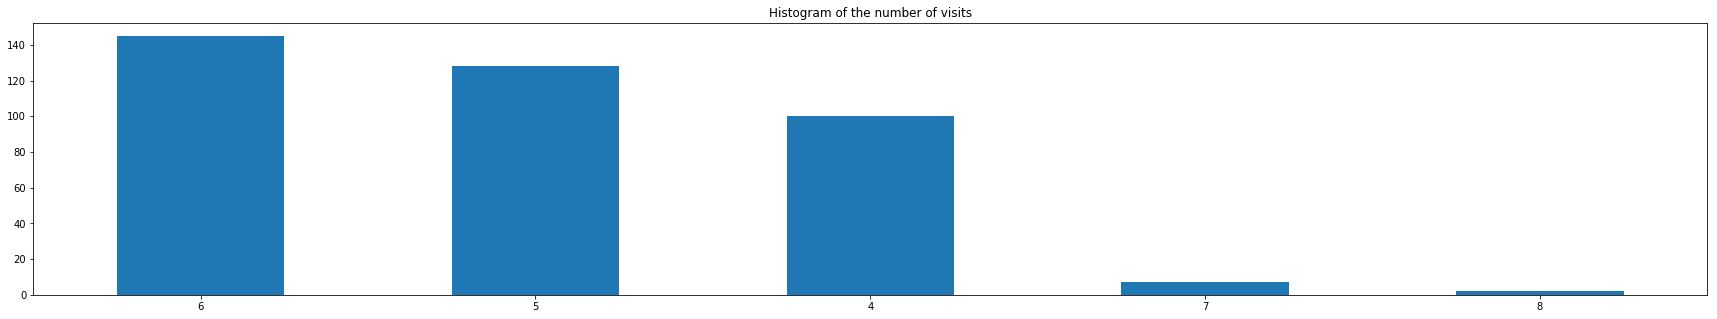

In [26]:
adni1_complete_3Yr_15T_bySubject = adni1_complete_3Yr_15T_feed.groupby(by='Subject')
adni1_complete_3Yr_15T_visits = adni1_complete_3Yr_15T_bySubject.count().max(axis=1)
adni1_complete_3Yr_15T_visits.value_counts().plot(kind='bar', 
                                                  title="Histogram of the number of visits", 
                                                  use_index=True, figsize=(30, 5))
plt.xticks(rotation=0)
plt.show()

In [4]:
diagnostics_feed = pd.read_csv(adni_utils.ADNI_DATA_DIR + 'DXSUM_PDXCONV_ADNIALL.csv')

# Add user and visit key column
user_key = []
for subj, vis in zip(diagnostics_feed['RID'], diagnostics_feed['VISCODE']):
    subj = rid_to_ptid[subj]
    user_key.append(subj+'_'+vis)
diagnostics_feed['user_key'] = user_key
diagnostics_feed

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,DXCHANGE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,update_stamp,user_key
0,ADNI1,2,2,107,bl,bl,2005-10-01,NaN,2005-09-29,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-01 00:00:00.0,011_S_0002_bl
1,ADNI1,4,3,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-10-01 00:00:00.0,011_S_0003_bl
2,ADNI1,6,5,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-01 00:00:00.0,011_S_0005_bl
3,ADNI1,8,8,107,bl,bl,2005-10-01,NaN,2005-09-30,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-10-01 00:00:00.0,011_S_0008_bl
4,ADNI1,10,7,10,bl,bl,2005-10-06,NaN,2005-10-06,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-06 00:00:00.0,022_S_0007_bl
5,ADNI1,12,15,4,bl,bl,2005-10-18,NaN,2005-10-18,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-18 00:00:00.0,100_S_0015_bl
6,ADNI1,14,30,11,bl,bl,2005-10-20,NaN,2005-10-20,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-20 00:00:00.0,023_S_0030_bl
7,ADNI1,16,31,11,bl,bl,2005-10-24,NaN,2005-10-24,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-10-24 00:00:00.0,023_S_0031_bl
8,ADNI1,18,16,107,bl,bl,2005-11-02,NaN,2005-10-25,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,2005-11-02 00:00:00.0,011_S_0016_bl
9,ADNI1,20,21,107,bl,bl,2005-11-02,NaN,2005-11-01,NaN,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,2005-11-02 00:00:00.0,011_S_0021_bl


In [27]:
print('Number of rows, total: ', len(adni1_complete_3Yr_15T_feed))
print('Number of longitudinal records, total: ', len(adni1_complete_3Yr_15T_visits))

Number of rows, total:  1975
Number of longitudinal records, total:  382


## Merge diagnostic feed and the imaging data feed

In [6]:
imaging_and_diagnostics = pd.merge(adni1_complete_3Yr_15T_feed, diagnostics_feed, on='user_key')
imaging_and_diagnostics.columns

Index(['Image Data ID', 'Subject', 'Group', 'Sex', 'Age', 'Visit', 'Modality',
       'Description', 'Type', 'Acq Date', 'Format', 'Downloaded', 'user_key',
       'Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN', 'DXCONV', 'DXCONTYP',
       'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1', 'DXMPTR2',
       'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE', 'DXMOTHET',
       'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP', 'DXAPROB',
       'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP', 'DXAOTHSP',
       'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP', 'DXPOTHSP',
       'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP', 'DXCONFID',
       'update_stamp'],
      dtype='object')

In [25]:
imaging_and_diagnostics[imaging_and_diagnostics['DXCURREN'].isnull()].transpose()

,11,213,1570
Image Data ID,204818,288924,288900
Subject,137_S_1414,127_S_1419,016_S_1326
Group,Patient,Patient,Patient
Sex,M,M,M
Age,78,81,70
Visit,8,8,8
Modality,MRI,MRI,MRI
Description,MPR; GradWarp; N3; Scaled,MT1; N3m,MT1; GradWarp; N3m
Type,Processed,Processed,Processed
Acq Date,8/18/2010,8/17/2010,5/12/2010
